In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [37]:
df = pd.read_csv("./data/KaggleV2-May-2016.csv")

In [38]:
# drop the columns that are only useful for data aggregation
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [39]:
# preliminary look at what the data is and how it looks
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [41]:
print("number of records (patients)", df.shape[0])
print("number of features", df.shape[1])

number of records (patients) 110527
number of features 12


In [42]:
# a few of our columns are either not spelled correctly or not named the best
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived'})


In [43]:
#first let's deal with the date columns so our analysis is a little easier
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [44]:
df.head(20)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [45]:
#lets make sure the appointment day always comes after the scheduled day
df['AppointmentDay'] = np.where((df['AppointmentDay']-df['ScheduledDay']).dt.days < 0, df['ScheduledDay'], df['AppointmentDay'])


In [46]:
# we can also rename our no-show column so its a little more intuitive
df['Presence'] = df['No-show'].apply(lambda x: 'Present' if x == "No" else 'Absent')
df = df.drop('No-show', 1)
df.head(20)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Presence
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Present
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Present
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Present
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Present
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,Present
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Absent
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Absent
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,Present
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,Present


In [47]:
# add a few features that could help us better understand the dataset
# add a feature to check how long the patient had to wait between the scheduling of the appointment and the exam date

df['Waiting Time Days'] = df['AppointmentDay']-df['ScheduledDay']
df['Waiting Time Days'] = df['Waiting Time Days'].dt.days
df.head(20)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Presence,Waiting Time Days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Present,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Present,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Present,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Present,0
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,Present,2
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Absent,2
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Absent,2
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,Present,0
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,Present,2


In [48]:
# add the days of the week so we can see if that makes a difference

df['WeekDay'] = df['AppointmentDay'].apply(lambda x: x.weekday())
replace_map = {'WeekDay': {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday'}}
df.replace(replace_map, inplace=True)
df.head(20)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Presence,Waiting Time Days,WeekDay
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Present,0,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Present,0,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Present,0,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present,0,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Present,0,Friday
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,Present,2,Friday
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Absent,2,Friday
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Absent,2,Friday
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,Present,0,Friday
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,Present,2,Friday


In [49]:
# add month
df['Month'] = df['AppointmentDay'].dt.month_name()

df.head(20)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Presence,Waiting Time Days,WeekDay,Month
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Present,0,Friday,April
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Present,0,Friday,April
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Present,0,Friday,April
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present,0,Friday,April
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Present,0,Friday,April
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,Present,2,Friday,April
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Absent,2,Friday,April
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Absent,2,Friday,April
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,Present,0,Friday,April
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,Present,2,Friday,April


In [50]:
# check for null vals

df.isnull().sum()

Gender               0
ScheduledDay         0
AppointmentDay       0
Age                  0
Neighbourhood        0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMSReceived          0
Presence             0
Waiting Time Days    0
WeekDay              0
Month                0
dtype: int64

In [51]:
# look at the unique vals and some descriptive stats
print("Unique Values in 'Gender'", list(df.Gender.unique()))
print("Unique Values in 'Scholarship'", list(df.Scholarship.unique()))
print("Unique Values in 'Hypertension'", list(df.Hypertension.unique()))
print("Unique Values in 'Diabetes'", list(df.Diabetes.unique()))
print("Unique Values in 'Alcoholism'", list(df.Alcoholism.unique()))
print("Unique Values in 'Handicap'", list(df.Handicap.unique()))
print("Unique Values in 'SMSReceived'", list(df.SMSReceived.unique()))


df.describe()

Unique Values in 'Gender' ['F', 'M']
Unique Values in 'Scholarship' [0, 1]
Unique Values in 'Hypertension' [1, 0]
Unique Values in 'Diabetes' [0, 1]
Unique Values in 'Alcoholism' [0, 1]
Unique Values in 'Handicap' [0, 1, 2, 3, 4]
Unique Values in 'SMSReceived' [0, 1]


,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Waiting Time Days
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183792
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254924
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


<function matplotlib.pyplot.show(*args, **kw)>

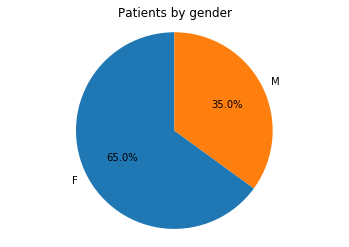

In [53]:
# lets look at the distribution of our genders
labels = df['Gender'].value_counts().index
sizes = df['Gender'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title("Patients by gender")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

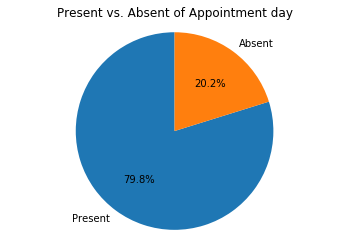

In [54]:
labels2 = df['Presence'].value_counts().index
sizes2 = df['Presence'].value_counts().values
fig2, ax2 = plt.subplots()
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
plt.title("Present vs. Absent of Appointment day")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

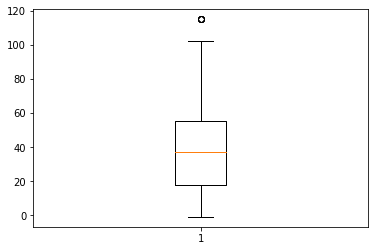

In [57]:
# now lets look at the age distribution of our population
values = df.Age.values
plt.boxplot(values)
plt.show

In [58]:
# lets split the data into present and absent tables to make some of the graphing a little easier
# Create variable with True if a patient is present
present = df['Presence'] == "Present"

# Select all cases where a patient is present
dfPresentPatients = df[present]
absent = df['Presence'] == "Absent"

# Select all cases where a patient is present
dfAbsentPatients = df[absent]



,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Presence,Waiting Time Days,WeekDay,Month
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Absent,2,Friday,April
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Absent,2,Friday,April
11,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Absent,3,Friday,April
17,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Absent,1,Friday,April
20,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Absent,2,Friday,April


<function matplotlib.pyplot.show(*args, **kw)>

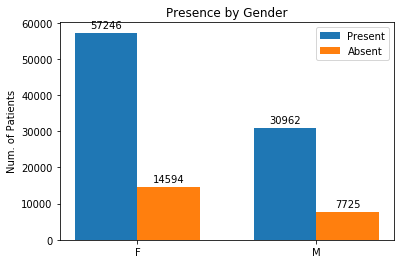

In [65]:
# lets see how gender affects presence
fig3, ax3 = plt.subplots()

width = 0.35
labels1 = dfPresentPatients["Gender"].value_counts().index
x = np.arange(len(labels1))

presentPatients = dfPresentPatients["Gender"].value_counts().values

absentPatients = dfAbsentPatients["Gender"].value_counts().values

p1 = ax3.bar(x - width/2, presentPatients, width, label="Present")
p2 = ax3.bar(x + width/2, absentPatients, width, label="Absent")
#set some labels
ax3.set_ylabel("Num. of Patients")
ax3.set_title("Presence by Gender")
ax3.set_xticks(x)
ax3.set_xticklabels(labels1)
ax3.legend()

def autoLabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax3.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autoLabel(p1)
autoLabel(p2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

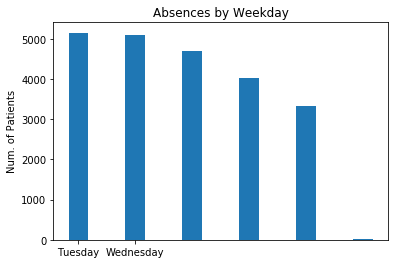

In [69]:
# on which weekdays do people show up the least
fig4, ax4 = plt.subplots()

width = 0.35
labels2 = dfAbsentPatients["WeekDay"].value_counts().index
x1 = np.arange(len(labels2))
patientsAbsent = dfAbsentPatients["WeekDay"].value_counts().values

p3 = ax4.bar(x1, patientsAbsent, width, label=labels2)

ax4.set_ylabel("Num. of Patients")
ax4.set_title("Absences by Weekday")
ax4.set_xticks(x)
ax4.set_xticklabels(labels2)


autolabel(p3)
plt.show